a) Using what you have learned so far in this course, create a plot illustrating the Bias-Variance trade-off. Make sure the lines and axes are labeled, with font size being the same as in the text.



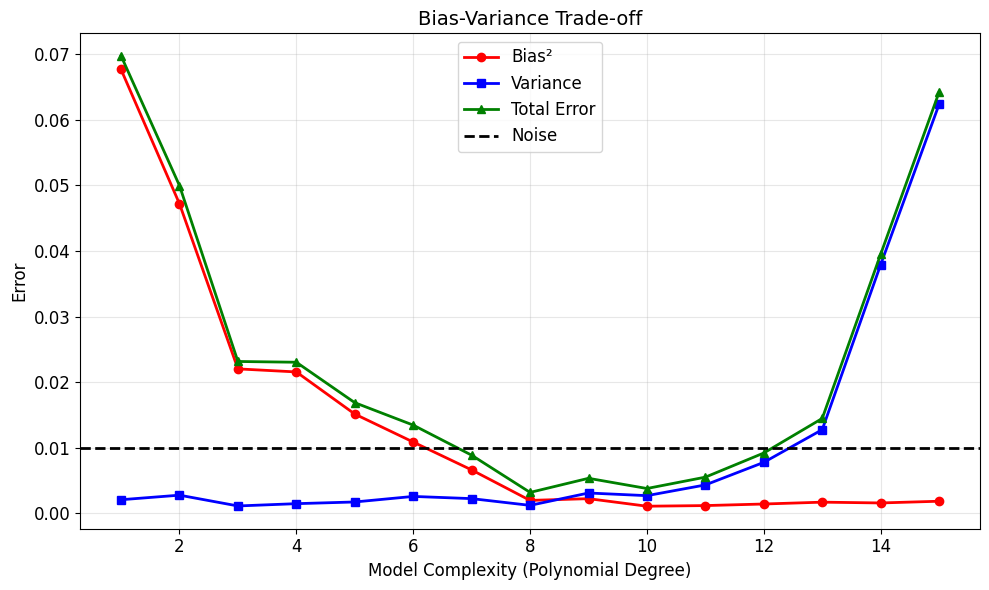

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

np.random.seed(42)

n = 100
bootstraps = 1000
degrees = range(1, 16)

x = np.linspace(-3, 3, n)
true_function = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))
noise = np.random.normal(0, 0.1, n)
y = true_function + noise

x_test = np.linspace(-3, 3, 50)
y_true_test = np.exp(-(x_test**2)) + 1.5 * np.exp(-((x_test - 2) ** 2))

biases = []
variances = []
mses = []

for degree in degrees:
    predictions = np.zeros((bootstraps, len(x_test)))
    
    for b in range(bootstraps):
        x_sample, y_sample = resample(x, y, random_state=b)
        poly = PolynomialFeatures(degree=degree)
        X_sample = poly.fit_transform(x_sample.reshape(-1, 1))
        X_test = poly.transform(x_test.reshape(-1, 1))
        model = LinearRegression()
        model.fit(X_sample, y_sample)
        predictions[b, :] = model.predict(X_test)
    
    expected_predictions = np.mean(predictions, axis=0)
    bias_squared = np.mean((expected_predictions - y_true_test)**2)
    variance = np.mean(np.var(predictions, axis=0))
    mse = np.mean((predictions - y_true_test)**2)
    
    biases.append(bias_squared)
    variances.append(variance)
    mses.append(mse)

noise_level = 0.01

plt.figure(figsize=(10, 6))
plt.plot(degrees, biases, 'r-o', linewidth=2, markersize=6, label='Bias²')
plt.plot(degrees, variances, 'b-s', linewidth=2, markersize=6, label='Variance')
plt.plot(degrees, mses, 'g-^', linewidth=2, markersize=6, label='Total Error')
plt.axhline(y=noise_level, color='k', linestyle='--', linewidth=2, label='Noise')
plt.xlabel('Model Complexity (Polynomial Degree)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Bias-Variance Trade-off', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("BiasVarianceTradeoff.png")
plt.show()

d) Create a heatmap showing the MSE of a Ridge regression model for various polynomial degrees and lambda values. Make sure the axes are labeled, and that the title or colorbar describes what is plotted.



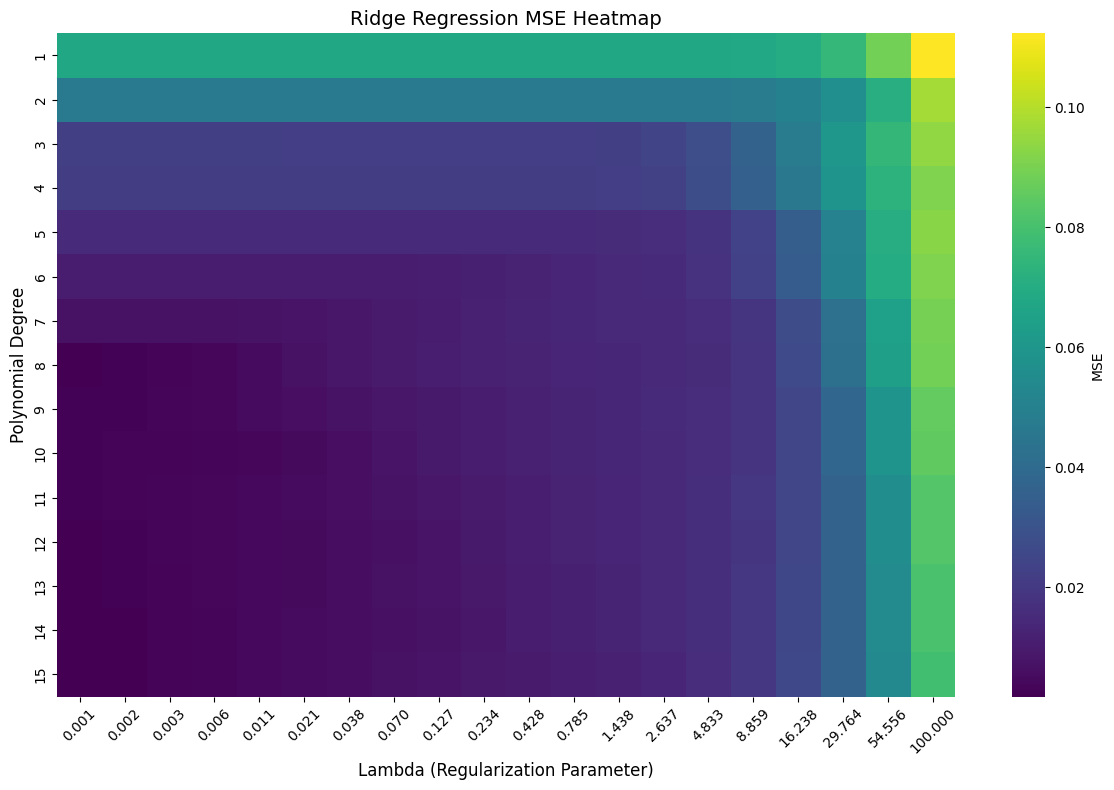

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import seaborn as sns

np.random.seed(42)

n = 100
degrees = range(1, 16)
lambdas = np.logspace(-3, 2, 20)

x = np.linspace(-3, 3, n)
true_function = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))
noise = np.random.normal(0, 0.1, n)
y = true_function + noise

x_test = np.linspace(-3, 3, 50)
y_true_test = np.exp(-(x_test**2)) + 1.5 * np.exp(-((x_test - 2) ** 2))

mse_matrix = np.zeros((len(degrees), len(lambdas)))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(x.reshape(-1, 1))
    X_test = poly.transform(x_test.reshape(-1, 1))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for j, lam in enumerate(lambdas):
        model = Ridge(alpha=lam)
        model.fit(X_train_scaled, y)
        y_pred = model.predict(X_test_scaled)
        mse_matrix[i, j] = np.mean((y_pred - y_true_test)**2)

plt.figure(figsize=(12, 8))
sns.heatmap(mse_matrix, 
            xticklabels=[f'{lam:.3f}' for lam in lambdas],
            yticklabels=degrees,
            cmap='viridis',
            cbar_kws={'label': 'MSE'})
plt.xlabel('Lambda (Regularization Parameter)', fontsize=12)
plt.ylabel('Polynomial Degree', fontsize=12)
plt.title('Ridge Regression MSE Heatmap', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("RidgeRegressionMSEHeatmap.png")
plt.show()